In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/population-dataset/World-population-by-countries-dataset.csv


#### Скачайте любой табличный датасет (можете использовать тот же, что и в дз к занятию "Знакомство с библиотеками"), например, с https://www.kaggle.com/datasets
#### Проведите поноценный EDA
#### "погрузитесь" в данные
#### составьте описание измерений из датасета
#### очистите данные, если это необходимо
#### попробуйте создать дополнительные переменные, которые могут помочь лучше понять данные

In [2]:
# импортируем библиотеки 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
# Загружаем произвольный Dataset
data = pd.read_csv('../input/population-dataset/World-population-by-countries-dataset.csv', index_col=0)
data.head(50)

,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,ABW,54208.0,55434.0,56234.0,56699.0,57029.0,57357.0,57702.0,58044.0,58377.0,...,1.025650e+05,1.031650e+05,1.037760e+05,1.043390e+05,1.048650e+05,1.053610e+05,1.058460e+05,1.063100e+05,1.067660e+05,1.071950e+05
Africa Eastern and Southern,AFE,130836765.0,134159786.0,137614644.0,141202036.0,144920186.0,148769974.0,152752671.0,156876454.0,161156430.0,...,5.474829e+08,5.626016e+08,5.780754e+08,5.938718e+08,6.099789e+08,6.263929e+08,6.430901e+08,6.600463e+08,6.772433e+08,6.946651e+08
Afghanistan,AFG,8996967.0,9169406.0,9351442.0,9543200.0,9744772.0,9956318.0,10174840.0,10399936.0,10637064.0,...,3.116138e+07,3.226959e+07,3.337080e+07,3.441360e+07,3.538303e+07,3.629611e+07,3.717192e+07,3.804176e+07,3.892834e+07,3.983543e+07
Africa Western and Central,AFW,96396419.0,98407221.0,100506960.0,102691339.0,104953470.0,107289875.0,109701811.0,112195950.0,114781116.0,...,3.702430e+08,3.804379e+08,3.908830e+08,4.015867e+08,4.125513e+08,4.237699e+08,4.352294e+08,4.469116e+08,4.588035e+08,4.708989e+08
Angola,AGO,5454938.0,5531451.0,5608499.0,5679409.0,5734995.0,5770573.0,5781305.0,5774440.0,5771973.0,...,2.510792e+07,2.601579e+07,2.694177e+07,2.788438e+07,2.884248e+07,2.981677e+07,3.080979e+07,3.182530e+07,3.286627e+07,3.393361e+07
Albania,ALB,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,1914573.0,1965598.0,2022272.0,...,2.900401e+06,2.895092e+06,2.889104e+06,2.880703e+06,2.876101e+06,2.873457e+06,2.866376e+06,2.854191e+06,2.837849e+06,2.811666e+06
Andorra,AND,13410.0,14378.0,15379.0,16407.0,17466.0,18542.0,19646.0,20760.0,21886.0,...,8.242700e+04,8.077000e+04,7.921300e+04,7.799300e+04,7.729500e+04,7.699700e+04,7.700800e+04,7.714600e+04,7.726500e+04,7.735400e+04
Arab World,ARB,92197715.0,94724540.0,97334438.0,100034191.0,102832792.0,105736428.0,108758634.0,111899335.0,115136161.0,...,3.714376e+08,3.796965e+08,3.878998e+08,3.960283e+08,4.040429e+08,4.119428e+08,4.198520e+08,4.278703e+08,4.360807e+08,4.445178e+08
United Arab Emirates,ARE,92417.0,100801.0,112112.0,125130.0,138049.0,149855.0,159979.0,169768.0,182620.0,...,9.141598e+06,9.197908e+06,9.214182e+06,9.262896e+06,9.360975e+06,9.487206e+06,9.630966e+06,9.770526e+06,9.890400e+06,9.991083e+06


In [4]:
# Визуализируем данные
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 266 entries, Aruba to Zimbabwe
Data columns (total 63 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Code  266 non-null    object 
 1   1960          264 non-null    float64
 2   1961          264 non-null    float64
 3   1962          264 non-null    float64
 4   1963          264 non-null    float64
 5   1964          264 non-null    float64
 6   1965          264 non-null    float64
 7   1966          264 non-null    float64
 8   1967          264 non-null    float64
 9   1968          264 non-null    float64
 10  1969          264 non-null    float64
 11  1970          264 non-null    float64
 12  1971          264 non-null    float64
 13  1972          264 non-null    float64
 14  1973          264 non-null    float64
 15  1974          264 non-null    float64
 16  1975          264 non-null    float64
 17  1976          264 non-null    float64
 18  1977          264 non-null

In [5]:
# Ищем пропуски
data.isnull().sum()

Country Code    0
1960            2
1961            2
1962            2
1963            2
               ..
2017            2
2018            2
2019            2
2020            2
2021            2
Length: 63, dtype: int64

In [6]:
data.describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
count,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,...,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02
mean,1.172174e+08,1.187633e+08,1.208717e+08,1.234910e+08,1.261315e+08,1.288372e+08,1.316853e+08,1.345256e+08,1.374350e+08,1.404490e+08,...,2.874902e+08,2.912969e+08,2.951160e+08,2.989277e+08,3.027560e+08,3.065980e+08,3.103591e+08,3.140425e+08,3.176734e+08,3.210893e+08
std,3.695745e+08,3.739180e+08,3.804316e+08,3.889142e+08,3.974401e+08,4.062000e+08,4.155171e+08,4.247722e+08,4.342805e+08,4.441772e+08,...,9.017511e+08,9.129343e+08,9.241050e+08,9.352101e+08,9.463321e+08,9.575052e+08,9.683483e+08,9.788967e+08,9.891628e+08,9.988295e+08
min,2.833000e+03,3.077000e+03,3.367000e+03,3.703000e+03,4.063000e+03,4.460000e+03,4.675000e+03,4.922000e+03,5.194000e+03,5.461000e+03,...,1.013600e+04,1.020800e+04,1.028900e+04,1.037400e+04,1.047400e+04,1.057700e+04,1.067800e+04,1.076400e+04,1.083400e+04,1.087300e+04
25%,5.022802e+05,5.109642e+05,5.206540e+05,5.311622e+05,5.421252e+05,5.533362e+05,5.647475e+05,5.823645e+05,5.981078e+05,6.100030e+05,...,1.539939e+06,1.574621e+06,1.609909e+06,1.645868e+06,1.689616e+06,1.716772e+06,1.740174e+06,1.751950e+06,1.767996e+06,1.791783e+06
50%,3.718330e+06,3.826398e+06,3.929109e+06,4.015834e+06,4.124521e+06,4.242788e+06,4.326013e+06,4.387887e+06,4.474171e+06,4.550402e+06,...,9.824808e+06,9.948838e+06,1.001582e+07,1.022085e+07,1.036160e+07,1.040671e+07,1.045548e+07,1.047907e+07,1.052565e+07,1.054019e+07
75%,2.636053e+07,2.721235e+07,2.808607e+07,2.890669e+07,2.972333e+07,3.055227e+07,3.134845e+07,3.200449e+07,3.244145e+07,3.277149e+07,...,6.057984e+07,6.120753e+07,6.174243e+07,6.182699e+07,6.187352e+07,6.191725e+07,6.193141e+07,6.150589e+07,6.157091e+07,6.295547e+07
max,3.032156e+09,3.071596e+09,3.124561e+09,3.189656e+09,3.255146e+09,3.322047e+09,3.392098e+09,3.461620e+09,3.532783e+09,3.606554e+09,...,7.089255e+09,7.175500e+09,7.261847e+09,7.347679e+09,7.433651e+09,7.519371e+09,7.602716e+09,7.683806e+09,7.763933e+09,7.836631e+09


In [7]:
data.corr()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
1960,1.000000,0.999983,0.999964,0.999958,0.999941,0.999913,0.999874,0.999819,0.999750,0.999666,...,0.986503,0.986019,0.985526,0.985014,0.984492,0.983951,0.983371,0.982748,0.982100,0.981336
1961,0.999983,1.000000,0.999996,0.999987,0.999969,0.999941,0.999896,0.999838,0.999766,0.999677,...,0.987021,0.986550,0.986070,0.985571,0.985062,0.984534,0.983968,0.983360,0.982729,0.981982
1962,0.999964,0.999996,1.000000,0.999995,0.999982,0.999958,0.999917,0.999863,0.999795,0.999711,...,0.987430,0.986967,0.986494,0.986003,0.985501,0.984980,0.984423,0.983823,0.983200,0.982464
1963,0.999958,0.999987,0.999995,1.000000,0.999996,0.999981,0.999951,0.999909,0.999853,0.999780,...,0.987762,0.987301,0.986831,0.986343,0.985844,0.985326,0.984771,0.984174,0.983554,0.982820
1964,0.999941,0.999969,0.999982,0.999996,1.000000,0.999995,0.999976,0.999945,0.999899,0.999837,...,0.988104,0.987647,0.987181,0.986696,0.986200,0.985686,0.985135,0.984541,0.983924,0.983195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017,0.983951,0.984534,0.984980,0.985326,0.985686,0.986053,0.986412,0.986792,0.987165,0.987513,...,0.999842,0.999898,0.999942,0.999974,0.999993,1.000000,0.999993,0.999970,0.999929,0.999865
2018,0.983371,0.983968,0.984423,0.984771,0.985135,0.985506,0.985867,0.986251,0.986628,0.986979,...,0.999768,0.999836,0.999894,0.999939,0.999972,0.999993,1.000000,0.999992,0.999967,0.999920
2019,0.982748,0.983360,0.983823,0.984174,0.984541,0.984916,0.985280,0.985668,0.986049,0.986404,...,0.999674,0.999756,0.999828,0.999888,0.999935,0.999970,0.999992,1.000000,0.999991,0.999963
2020,0.982100,0.982729,0.983200,0.983554,0.983924,0.984301,0.984668,0.985059,0.985443,0.985800,...,0.999560,0.999657,0.999742,0.999817,0.999879,0.999929,0.999967,0.999991,1.000000,0.999990


created missing indicator for: 1960
created missing indicator for: 1961
created missing indicator for: 1962
created missing indicator for: 1963
created missing indicator for: 1964
created missing indicator for: 1965
created missing indicator for: 1966
created missing indicator for: 1967
created missing indicator for: 1968
created missing indicator for: 1969
created missing indicator for: 1970
created missing indicator for: 1971
created missing indicator for: 1972
created missing indicator for: 1973
created missing indicator for: 1974
created missing indicator for: 1975
created missing indicator for: 1976
created missing indicator for: 1977
created missing indicator for: 1978
created missing indicator for: 1979
created missing indicator for: 1980
created missing indicator for: 1981
created missing indicator for: 1982
created missing indicator for: 1983
created missing indicator for: 1984
created missing indicator for: 1985
created missing indicator for: 1986
created missing indicator fo

<AxesSubplot:xlabel='index'>

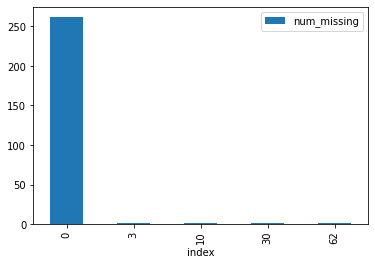

In [8]:
for col in data.columns:
    missing = data[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        print('created missing indicator for: {}'.format(col))
        data['{}_ismissing'.format(col)] = missing


# затем на основе индикатора строим гистограмму
ismissing_cols = [col for col in data.columns if 'ismissing' in col]
data['num_missing'] = data[ismissing_cols].sum(axis=1)

data['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')

<AxesSubplot:ylabel='Country Name'>

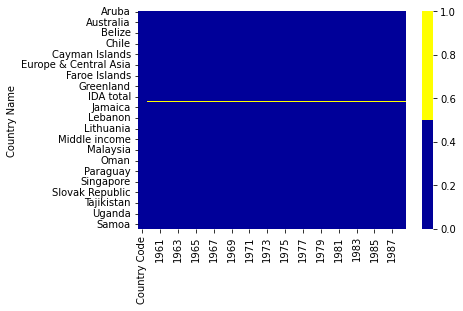

In [9]:
cols = data.columns[:30] # первые 30 колонок
# определяем цвета 
# желтый - пропущенные данные, синий - не пропущенные
colours = ['#000099', '#ffff00'] 
sns.heatmap(data[cols].isnull(), cmap=sns.color_palette(colours))

In [10]:
for col in data.columns:
    pct_missing = np.mean(data[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Country Code - 0%
1960 - 1%
1961 - 1%
1962 - 1%
1963 - 1%
1964 - 1%
1965 - 1%
1966 - 1%
1967 - 1%
1968 - 1%
1969 - 1%
1970 - 1%
1971 - 1%
1972 - 1%
1973 - 1%
1974 - 1%
1975 - 1%
1976 - 1%
1977 - 1%
1978 - 1%
1979 - 1%
1980 - 1%
1981 - 1%
1982 - 1%
1983 - 1%
1984 - 1%
1985 - 1%
1986 - 1%
1987 - 1%
1988 - 1%
1989 - 1%
1990 - 0%
1991 - 0%
1992 - 1%
1993 - 1%
1994 - 1%
1995 - 0%
1996 - 0%
1997 - 0%
1998 - 0%
1999 - 0%
2000 - 0%
2001 - 0%
2002 - 0%
2003 - 0%
2004 - 0%
2005 - 0%
2006 - 0%
2007 - 0%
2008 - 0%
2009 - 0%
2010 - 0%
2011 - 0%
2012 - 1%
2013 - 1%
2014 - 1%
2015 - 1%
2016 - 1%
2017 - 1%
2018 - 1%
2019 - 1%
2020 - 1%
2021 - 1%
1960_ismissing - 0%
1961_ismissing - 0%
1962_ismissing - 0%
1963_ismissing - 0%
1964_ismissing - 0%
1965_ismissing - 0%
1966_ismissing - 0%
1967_ismissing - 0%
1968_ismissing - 0%
1969_ismissing - 0%
1970_ismissing - 0%
1971_ismissing - 0%
1972_ismissing - 0%
1973_ismissing - 0%
1974_ismissing - 0%
1975_ismissing - 0%
1976_ismissing - 0%
1977_ismissing - 0%
19

#### 1. Вычислите A + B, A - B
 
 $\\
A = \left(
\begin{array}{cccc}
1 & -2 & 4\\
2 & 0 & -1\\
\end{array}
\right), B = \left(
\begin{array}{cccc}
5 & 2 & 3\\
4 & 6 & 2\\
\end{array}
\right)$

In [11]:
A = np.array([[1, -2, 4], [2, 0, -1]])
B = np.array([[5, 2, 3], [4, 6, 2]])
A,B

(array([[ 1, -2,  4],
        [ 2,  0, -1]]),
 array([[5, 2, 3],
        [4, 6, 2]]))

In [12]:
A+B

array([[6, 0, 7],
       [6, 6, 1]])

In [13]:
A-B

array([[-4, -4,  1],
       [-2, -6, -3]])

#### 2. Найдите матрицу С = A - 3B
 
 $\\
A = \left(
\begin{array}{cccc}
1 & 2 \\
2 & -1\\
3 & 0\\
\end{array}
\right), B = \left(
\begin{array}{cccc}
-1 & 1 \\
1 & 2\\
0 & 0\\
\end{array}
\right)$

In [14]:
A=np.array([[1,2], [2,-1], [3,0]])
B=np.array([[-1,1], [1,2], [0,0]])
A,B

(array([[ 1,  2],
        [ 2, -1],
        [ 3,  0]]),
 array([[-1,  1],
        [ 1,  2],
        [ 0,  0]]))

In [15]:
C = A - 3*B
C

array([[ 4, -1],
       [-1, -7],
       [ 3,  0]])

#### 3. Вычислите С = AB
 
 $\\
A = \left(
\begin{array}{cccc}
1 & -1 \\
2 & 0\\
3 & 0\\
\end{array}
\right), B = \left(
\begin{array}{cccc}
1 & 1 \\
2 & 0\\
\end{array}
\right)$

In [16]:
A = np.array([[1, -1], [2,0], [3,0]])
B = np.array([[1,1], [2,0]])
A,B

(array([[ 1, -1],
        [ 2,  0],
        [ 3,  0]]),
 array([[1, 1],
        [2, 0]]))

In [17]:
C = A.dot(B)
C

array([[-1,  1],
       [ 2,  2],
       [ 3,  3]])

#### 4. Вычислите определитель матрицы А
 
 $\\
A = \left(
\begin{array}{cccc}
6 & -1 & 4\\
2 & 1 & 10\\
8 & 0 & 2\\
\end{array}
\right)$

In [18]:
A = np.array([[6, -1, 4], [2, 1, 10], [8, 0, 2]])
A

array([[ 6, -1,  4],
       [ 2,  1, 10],
       [ 8,  0,  2]])

In [19]:
from scipy import linalg

np.linalg.det(A)

-95.99999999999999

#### 5. Вычислите матрицу, обратную матрице А. И покажите, что она действительно является обратной
 
 $\\
A = \left(
\begin{array}{cccc}
3 & 3 & -1\\
4 & 1 & 3\\
1 & -2 & -2\\
\end{array}
\right)$

In [20]:
A = np.array([[3,3,-1], [4,1,3], [1,-2,-2]])
A

array([[ 3,  3, -1],
       [ 4,  1,  3],
       [ 1, -2, -2]])

In [21]:
B = np.linalg.inv(A)
B

array([[ 0.07407407,  0.14814815,  0.18518519],
       [ 0.2037037 , -0.09259259, -0.24074074],
       [-0.16666667,  0.16666667, -0.16666667]])

In [22]:
A.dot(B)

array([[ 1.00000000e+00, -2.77555756e-17,  1.38777878e-16],
       [ 2.77555756e-17,  1.00000000e+00,  2.77555756e-17],
       [-5.55111512e-17,  5.55111512e-17,  1.00000000e+00]])

In [23]:
B.dot(A)

array([[ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 5.55111512e-17,  1.00000000e+00, -1.11022302e-16],
       [-2.77555756e-17, -5.55111512e-17,  1.00000000e+00]])

**B является обратной матрицей, так как результатом умножения матрицы А на матрицу B получается единичная матрица**